In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


forest = pd.read_csv('./csv/forest.csv', sep = ',')
forest_area = pd.read_csv('./csv/forest_area.csv', sep = ',')
brazil_loss = pd.read_csv('./csv/brazil_loss.csv', sep = ',')
soybean_use = pd.read_csv('./csv/soybean_use.csv', sep = ',')
vegetable_oil = pd.read_csv('./csv/vegetable_oil.csv', sep = ',')
pd.set_option("max_rows", 100)
def tamanhoPlot(x, y):
    fig_dims = (x, y)
    fig, ax = plt.subplots(figsize=fig_dims)
    return ax

In [3]:
def filtroBRICS(df):
    data = df[(df.Código.notna()) &((df['Entidade'] == 'Brazil')#Seleção de alguns países
                                        | (df['Entidade'] == 'India') 
                                        | (df['Entidade'] == 'Russia')
                                        |(df['Entidade'] == 'China')
                                        |(df['Entidade'] == 'South Africa'))]
    data.dropna(inplace=True)
    return data

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Ano', ylabel='Conversão_líquida_de_floresta'>

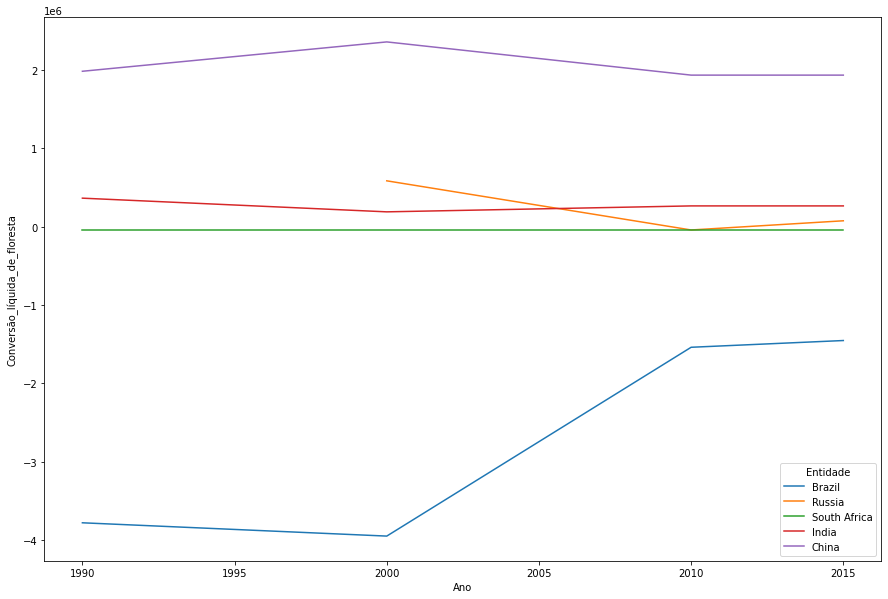

In [4]:
data = filtroBRICS(forest)
data = data.sort_values(['Conversão_líquida_de_floresta'])
ls = pd.melt(data, id_vars=['Entidade', 'Código', 'Ano'], value_vars=data.columns, var_name='Conversão', value_name='Conversão de florestas em hectares')
ax = tamanhoPlot(15, 10)
sns.lineplot(x='Ano', y='Conversão_líquida_de_floresta', data=data, hue='Entidade', ax=ax)